In [5]:
import os 
# os.chdir('C:\\Users\\rhian\\Downloads\\Capstone\\County Health Rankings Data')
os.getcwd() 

'C:\\Users\\rhian\\Downloads\\Capstone\\drugs\\Data\\Features\\County_Health_Rankings_Raw_Data'

In [6]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)

## GET SHEET 1 

In [8]:
#### READ IN 2011 ####
# no District of Columbia *** 
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2011 = pd.DataFrame()

for i in states_full:
    filename = r"2011 County Health Ranking {} Data - v4.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(3, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Deaths', 
                        'YPLL Rate', '% LBW', 
                        '% Smokers', '% Obese', '% Excessive Drinking', 
                        'MV mortality rate', 'Teen Birth Rate', '% Uninsured', 
                        'PCP Rate.1', 'AFGR', 'PSED', 
                        '% Children in Poverty', 
                        '% Single-Parent Households', 'Violent Crime Rate']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Premature Deaths', 
                          'Potential Years Lost', '% Low Weight Births', 
                          '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                          'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                          'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                          '% Children in Poverty', 
                          '% 1PHH', 'Violent Crime Rate']

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2011) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2011 = pd.concat([health2011, state_year]).reset_index(drop=True)
    
health2011

,Year,FIPS,State,County,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2011,1000.0,Alabama,Whole State,68872.0,10189.2,10.21,23.6,31.9,12.6,25.6,53.2,17.1,105.0,67.0,55.1,22.1,36.2,431.9
1,2011,1001.0,Alabama,Autauga,675.0,9967.4,9.45,27.4,31.5,14.1,28.3,52.0,15.5,67.5,75.0,55.4,14.9,29.7,256.3
2,2011,1003.0,Alabama,Baldwin,2219.0,8321.8,8.82,21.9,26.2,19.4,23.2,49.6,20.9,120.9,70.0,61.5,15.1,28.9,194.7
3,2011,1005.0,Alabama,Barbour,403.0,9559.0,11.35,22.9,37.6,8.5,29.2,79.9,16.3,57.0,55.0,34.7,31.9,52.5,72.2
4,2011,1007.0,Alabama,Bibb,365.0,13282.9,9.94,33.0,32.3,11.3,42.5,64.4,19.9,41.7,60.0,40.3,25.0,32.0,164.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2011,56037.0,Wyoming,Sweetwater,422.0,9195.1,9.23,26.7,29.6,21.5,31.7,51.8,18.1,60.1,75.0,58.1,7.5,24.9,596.9
3186,2011,56039.0,Wyoming,Teton,109.0,4232.2,7.44,12.1,13.2,23.2,20.1,40.7,25.4,165.5,85.0,72.4,6.3,12.8,295.7
3187,2011,56041.0,Wyoming,Uinta,228.0,9536.5,10.94,19.7,30.3,14.3,30.6,48.2,16.9,87.6,85.0,57.9,10.4,18.5,95.9
3188,2011,56043.0,Wyoming,Washakie,87.0,7618.0,6.42,16.1,24.0,11.7,27.4,38.8,18.8,64.0,85.0,67.5,14.9,13.3,287.4


In [9]:
#### READ IN 2012 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


health2012 = pd.DataFrame()

for i in states_full:
    filename = r"2012 County Health Ranking {} Data - v4.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(3, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Deaths', 
                        'YPLL Rate', '% LBW', 
                        '% Smokers', '% Obese', '% Excessive Drinking', 
                        'MV Mortality Rate', 'Teen Birth Rate', '% Uninsured', 
                        'PCP Rate.1', 'AFGR', 'PSED', 
                        '% Children in Poverty', 
                        '% Single-Parent Households', 'Violent Crime Rate']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Premature Deaths', 
                          'Potential Years Lost', '% Low Weight Births', 
                          '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                          'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                          'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                          '% Children in Poverty', 
                          '% 1PHH', 'Violent Crime Rate']

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2012) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2012 = pd.concat([health2012, state_year]).reset_index(drop=True)

health2012

,Year,FIPS,State,County,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2012,1000.0,Alabama,Whole State,69614.0,10152.06,10.3,23.1,32.87045,12.3,25.503667,52.8,15.8,105.0,70.0,55.635436,27.4,36.650152,459.241436
1,2012,1001.0,Alabama,Autauga,721.0,9865.83,9.7,24.6,34.10000,15.9,28.383137,50.6,13.8,67.5,84.5,54.245509,17.5,29.536325,290.509373
2,2012,1003.0,Alabama,Baldwin,2228.0,8091.77,9.0,22.7,25.50000,19.7,23.183653,50.0,16.4,120.9,72.6,60.762559,20.2,28.522118,241.880520
3,2012,1005.0,Alabama,Barbour,366.0,8835.69,12.1,23.4,37.00000,11.0,28.495156,74.3,19.4,57.0,64.1,39.140749,36.2,51.958266,189.964747
4,2012,1007.0,Alabama,Bibb,378.0,13096.85,10.0,35.1,34.00000,13.1,41.189719,58.8,18.4,41.7,67.3,40.358603,28.6,35.494881,219.748022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2012,56037.0,Wyoming,Sweetwater,435.0,9292.34,9.5,25.7,29.60000,20.2,30.975119,53.2,15.8,60.1,80.8,56.880893,13.2,25.618878,552.297491
3186,2012,56039.0,Wyoming,Teton,102.0,3664.14,7.1,11.4,13.80000,21.9,15.570203,39.5,18.0,165.5,93.0,67.561370,14.0,8.938547,231.432089
3187,2012,56041.0,Wyoming,Uinta,238.0,9299.84,10.4,19.5,30.90000,14.4,30.664347,46.3,16.9,87.6,86.9,55.283019,14.1,20.049140,92.896956
3188,2012,56043.0,Wyoming,Washakie,84.0,7302.53,6.5,14.3,24.50000,11.8,32.576237,40.8,20.2,64.0,81.1,62.340672,15.6,14.583333,220.759924


In [11]:
#### READ IN 2013 ####
# took out Hawaii ***rectified 
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2013 = pd.DataFrame()

for i in states_full:
    filename = r"2013 County Health Ranking {} Data - v1_0.xls".format(i)
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(4, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Deaths', 
                        'YPLL Rate', '% LBW', 
                        '% Smokers', '% Obese', '% Excessive Drinking', 
                        'MV Mortality Rate', 'Teen Birth Rate', '% Uninsured', 
                        'PCP Rate', 'AFGR', '# Some College', 
                        '% Children in Poverty', 
                        '% Single-Parent Households', 'Violent Crime Rate']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Premature Deaths', 
                          'Potential Years Lost', '% Low Weight Births', 
                          '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                          'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                          'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                          '% Children in Poverty', 
                          '% 1PHH', 'Violent Crime Rate']

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2013) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2013 = pd.concat([health2013, state_year]).reset_index(drop=True)
    
# health2013

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/3607897493.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


In [12]:
#### READ IN Hawaii 2013 #### 
xls = pd.ExcelFile('2013 County Health Ranking Hawaii Data - v1_0.xls')
sheet = xls.parse(3, header = 1)

state_year = sheet[['FIPS', 'State', 'County', 'Deaths', 
                    'YPLL Rate', '% LBW', 
                    '% Smokers', '% Obese', '% Excessive Drinking', 
                    'MV Mortality Rate', 'Teen Birth Rate', '% Uninsured', 
                    'PCP Rate', 'AFGR', '# Some College', 
                    '% Children in Poverty', 
                    '% Single-Parent Households', 'Violent Crime Rate']] 

state_year.columns = ['FIPS', 'State', 'County', 'Premature Deaths', 
                      'Potential Years Lost', '% Low Weight Births', 
                      '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                      'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                      'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                      '% Children in Poverty', 
                      '% 1PHH', 'Violent Crime Rate']

state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

state_year.insert(0, "Year", 2013) # add the year 

# Label total County value  
state_year['County'][0] = 'Whole State' 

state_year


# Append Hawaii 2013 to rest of 2013
health2013 = pd.concat([health2013, state_year]).reset_index(drop=True)
    
health2013

,Year,FIPS,State,County,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2013,1000.0,Alabama,Whole State,70721.0,9608.90,10.4,22.5,32.87045,12.3,23.145770,49.331992,16.9,60.93533,72.000000,692921.0,27.6,37.112499,426.569135
1,2013,1001.0,Alabama,Autauga,729.0,8376.42,9.4,23.5,34.10000,16.5,23.917000,42.505593,13.6,36.60523,80.000000,7990.0,21.0,26.471594,300.336683
2,2013,1003.0,Alabama,Baldwin,2325.0,7770.16,8.8,22.6,25.50000,18.7,19.975394,48.242627,19.1,74.21191,74.000000,27428.0,20.5,28.141964,214.735210
3,2013,1005.0,Alabama,Barbour,422.0,9458.14,12.3,23.5,37.00000,12.7,26.173443,74.432630,18.5,43.81161,61.087854,3164.0,39.8,56.521028,150.049428
4,2013,1007.0,Alabama,Bibb,390.0,11543.90,11.9,32.8,34.00000,13.2,33.787876,47.786230,17.7,26.22378,73.000000,2586.0,30.5,37.687406,246.497551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2013,15001.0,Hawaii,Hawaii,1957.0,6853.26,8.0,19.5,23.80000,21.1,19.146954,45.947963,11.7,74.44129,NaN,24486.0,29.9,36.991013,263.748077
3186,2013,15003.0,Hawaii,Honolulu,7956.0,5489.64,8.3,15.1,21.70000,18.9,7.205927,34.018211,7.9,87.89958,100.000000,180444.0,13.9,27.505217,276.857129
3187,2013,15005.0,Hawaii,Kalawao,NaN,NaN,NaN,NaN,27.20000,NaN,NaN,NaN,NaN,0.00000,NaN,12.0,NaN,NaN,NaN
3188,2013,15007.0,Hawaii,Kauai,659.0,6181.37,7.7,15.9,21.70000,21.1,13.713022,43.300134,9.8,95.21401,NaN,10224.0,18.3,28.310380,342.509784


In [13]:
#### READ IN 2014 #### 
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2014 = pd.DataFrame()

for i in states_full:

    filename = r"2014 County Health Rankings {} Data - v6.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    
    sheet = xls.parse(3, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Deaths', 
                        'YPLL Rate', '% LBW', 
                        '% Smokers', '% Obese', '% Excessive Drinking', 
                        '% Alcohol-Impaired', 'Teen Birth Rate', '% Uninsured', 
                        'PCP Rate', 'Graduation Rate', '% Some College', 
                        '% Children in Poverty', 
                        '% Single-Parent Households', 'Violent Crime Rate']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Premature Deaths', 
                          'Potential Years Lost', '% Low Weight Births', 
                          '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                          'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                          'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                          '% Children in Poverty', 
                          '% 1PHH', 'Violent Crime Rate']


    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2014) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2014 = pd.concat([health2014, state_year]).reset_index(drop=True)
    
health2014

,Year,FIPS,State,County,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2014,1000.0,Alabama,Whole State,70721.0,9608.90,10.4,21.9,33.002572,12.2,28.684092,47.866784,16.620477,62.04791,74.469288,57.377768,27.6,37.451330,417.686443
1,2014,1001.0,Alabama,Autauga,729.0,8376.42,9.3,21.7,30.500000,16.7,25.490196,38.992409,13.931282,37.99736,80.000000,54.732198,18.5,30.124949,302.909674
2,2014,1003.0,Alabama,Baldwin,2325.0,7770.16,8.9,20.6,26.600000,17.9,31.851852,46.396536,16.580195,74.97978,74.000000,61.784534,20.5,27.879987,213.301026
3,2014,1005.0,Alabama,Barbour,422.0,9458.14,12.3,25.1,37.300000,13.5,47.619048,73.779983,18.910066,44.24942,60.640060,41.407089,47.0,55.907877,154.326484
4,2014,1007.0,Alabama,Bibb,390.0,11543.90,12.7,25.9,34.300000,11.2,27.586207,49.276496,15.978070,21.96258,73.000000,44.198175,27.2,39.281642,254.237288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2014,56037.0,Wyoming,Sweetwater,400.0,7433.01,9.4,24.3,27.400000,21.3,39.726027,55.583375,16.405976,29.42841,79.970179,57.347670,11.5,23.791695,442.835390
3186,2014,56039.0,Wyoming,Teton,113.0,4054.30,6.7,9.8,13.100000,21.1,19.230769,31.164902,21.038650,125.30165,87.500000,69.551616,14.2,18.107477,263.989063
3187,2014,56041.0,Wyoming,Uinta,219.0,8171.36,8.9,17.6,29.800000,13.7,25.000000,41.527002,15.930381,38.12247,86.583851,56.123380,16.0,21.174952,56.006721
3188,2014,56043.0,Wyoming,Washakie,100.0,6580.01,5.9,14.0,24.100000,9.9,25.000000,41.878891,18.251174,47.13091,77.500000,66.362600,18.3,22.992874,67.970093


In [14]:
#### READ IN 2015 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2015 = pd.DataFrame()

for i in states_full:
    filename = r"2015 County Health Rankings {} Data - v3.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(3, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', '# Deaths', 
                        'Years of Potential Life Lost Rate', '% LBW', 
                        '% Smokers', '% Obese', '% Excessive Drinking', 
                        '% Alcohol-Impaired', 'Teen Birth Rate', '% Uninsured', 
                        'PCP Rate', 'Graduation Rate', '% Some College', 
                        '% Children in Poverty', 
                        '% Single-Parent Households', 'Violent Crime Rate']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Premature Deaths', 
                          'Potential Years Lost', '% Low Weight Births', 
                          '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                          'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                          'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                          '% Children in Poverty', 
                          '% 1PHH', 'Violent Crime Rate']
    
    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2015) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2015 = pd.concat([health2015, state_year]).reset_index(drop=True)
    
health2015

,Year,FIPS,State,County,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2015,1000.0,Alabama,Whole State,72385.0,9507.90,10.296385,21.9,33.22678,12.2,27.863920,46.652295,15.766747,62.75374,76.947372,57.955766,27.4,38.258636,417.968873
1,2015,1001.0,Alabama,Autauga,754.0,8405.21,9.085079,21.7,31.30000,16.7,33.333333,36.499863,12.836707,32.42425,81.000000,56.037152,19.6,29.629370,253.644617
2,2015,1003.0,Alabama,Baldwin,2460.0,7456.89,8.670182,20.6,25.00000,17.9,30.281690,44.532662,15.790292,75.47565,74.000000,62.489227,20.8,29.242728,220.665106
3,2015,1005.0,Alabama,Barbour,414.0,8900.51,11.877875,25.1,38.40000,13.5,43.478261,72.873800,17.528431,44.11603,69.696108,42.328326,42.4,55.824663,146.888576
4,2015,1007.0,Alabama,Bibb,407.0,10729.22,12.787437,25.9,37.30000,11.2,31.034483,50.850851,15.104646,26.55220,80.000000,50.000000,35.6,37.176424,235.952110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2015,56037.0,Wyoming,Sweetwater,420.0,7064.96,9.497091,24.3,28.70000,21.3,42.372881,52.298099,16.980249,30.92761,81.177876,57.203791,11.3,25.516953,429.278285
3186,2015,56039.0,Wyoming,Teton,112.0,3852.81,6.292606,9.8,13.20000,21.1,22.222222,27.100271,21.369132,138.40830,82.500000,72.993278,10.5,18.447989,299.352183
3187,2015,56041.0,Wyoming,Uinta,225.0,7435.94,8.985383,17.6,29.30000,13.7,16.666667,42.513168,15.805471,47.56243,79.237389,56.966332,13.5,22.218675,45.362551
3188,2015,56043.0,Wyoming,Washakie,105.0,7571.92,5.240793,14.0,24.20000,9.9,25.000000,39.705048,18.789668,35.44423,86.633663,65.792411,14.5,26.318290,69.916489


In [15]:
#### READ IN 2016 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2016 = pd.DataFrame()

for i in states_full:
    filename = r"2016 County Health Rankings {} Data - v3.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(3, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', '# Deaths', 
                        'Years of Potential Life Lost Rate', '% LBW', 
                        '% Smokers', '% Obese', '% Excessive Drinking', 
                        '% Alcohol-Impaired', 'Teen Birth Rate', '% Uninsured', 
                        'PCP Rate', 'Graduation Rate', '% Some College', 
                        '% Children in Poverty', 
                        '% Single-Parent Households', 'Violent Crime Rate']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Premature Deaths', 
                          'Potential Years Lost', '% Low Weight Births', 
                          '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                          'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                          'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                          '% Children in Poverty', 
                          '% 1PHH', 'Violent Crime Rate']

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2016) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2016 = pd.concat([health2016, state_year]).reset_index(drop=True)

health2016

,Year,FIPS,State,County,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2016,1000.0,Alabama,Whole State,73929.0,9544.7,10.225973,21.1,33.591186,13.3,29.669306,44.232452,15.871772,63.76039,81.383355,58.351515,27.4,38.385412,417.968873
1,2016,1001.0,Alabama,Autauga,809.0,9215.1,8.786701,18.7,30.900000,15.1,31.818182,35.183521,13.420535,39.82189,83.000000,56.470750,18.1,27.306299,253.644617
2,2016,1003.0,Alabama,Baldwin,2506.0,7454.6,8.507297,18.6,26.700000,15.1,39.436620,41.620561,17.482003,75.17643,80.000000,62.335918,19.8,28.225374,220.665106
3,2016,1005.0,Alabama,Barbour,410.0,8499.9,12.148280,21.4,40.800000,12.4,39.130435,67.902335,17.439893,36.93308,80.530303,43.358568,38.1,54.480041,146.888576
4,2016,1007.0,Alabama,Bibb,414.0,11007.7,12.415730,21.0,40.100000,13.8,34.375000,48.393740,14.954139,35.53660,81.000000,48.927875,26.8,32.045221,235.952110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2016,56037.0,Wyoming,Sweetwater,427.0,6820.2,9.220008,19.1,29.200000,18.3,54.716981,50.120773,14.403059,35.36928,79.135338,55.479934,11.9,26.311393,429.278285
3186,2016,56039.0,Wyoming,Teton,108.0,3793.2,6.489362,14.6,12.500000,22.4,25.000000,23.186683,19.864664,130.23172,87.500000,74.536623,9.5,19.093539,299.352183
3187,2016,56041.0,Wyoming,Uinta,232.0,7597.7,9.420916,18.1,29.600000,16.4,7.692308,40.226629,14.668025,42.72287,80.615497,56.991409,12.6,24.007713,45.362551
3188,2016,56043.0,Wyoming,Washakie,100.0,8360.2,6.167401,16.3,24.700000,14.5,33.333333,36.158192,18.521273,35.44842,81.504425,57.070423,16.2,28.818444,69.916489


In [16]:
#### READ IN 2017 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2017 = pd.DataFrame()

for i in states_full:
    filename = r"2017 County Health Rankings {} Data - v2.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(3, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', '# Deaths', 
                        'Years of Potential Life Lost Rate', '% LBW', 
                        '% Smokers', '% Obese', '% Excessive Drinking', 
                        '% Alcohol-Impaired', 'Teen Birth Rate', '% Uninsured', 
                        'PCP Rate', 'Graduation Rate', '% Some College', 
                        '% Children in Poverty', 
                        '% Single-Parent Households', 'Violent Crime Rate']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Premature Deaths', 
                          'Potential Years Lost', '% Low Weight Births', 
                          '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                          'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                          'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                          '% Children in Poverty', 
                          '% 1PHH', 'Violent Crime Rate']

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2017) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2017 = pd.concat([health2017, state_year]).reset_index(drop=True)
    
health2017

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/1575337285.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2017,1000,Alabama,Whole State,75262.0,9573.2,10.179326,21.404947,34.040806,12.965296,29.432376,41.415001,14.161384,64.44127,89.322537,58.986505,26.5,38.197092,436.025288
1,2017,1001,Alabama,Autauga,830.0,9158.2,8.789277,17.380239,34.100000,14.954122,32.653061,32.418778,11.016234,41.51999,90.000000,59.674515,18.8,25.165611,265.699747
2,2017,1003,Alabama,Baldwin,2573.0,7393.9,8.630640,17.937120,27.400000,15.378031,34.228188,38.019408,16.132992,73.95895,85.000000,62.887664,19.6,26.783655,216.773078
3,2017,1005,Alabama,Barbour,413.0,8573.1,11.669058,22.776689,44.400000,11.923450,38.461538,59.021292,15.342094,40.91196,86.173469,39.266943,45.2,56.455563,328.659071
4,2017,1007,Alabama,Bibb,407.0,11766.1,11.968236,19.850766,40.300000,14.309652,33.333333,47.497880,13.564171,39.98934,85.000000,50.222018,29.3,29.569672,147.290900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,2017,56037,Wyoming,Sweetwater,445.0,6877.7,9.475720,17.600275,31.700000,19.099118,48.888889,46.146096,14.034125,33.32593,78.225352,56.364906,10.2,24.741149,350.161133
3181,2017,56039,Wyoming,Teton,116.0,3728.2,6.492089,14.324619,12.700000,22.001780,8.333333,20.426288,15.042744,126.47187,97.500000,76.123315,7.6,21.062664,NaN
3182,2017,56041,Wyoming,Uinta,234.0,7660.1,9.877085,18.317184,27.900000,16.662460,8.333333,37.457435,13.085534,43.05396,85.675516,55.179430,11.9,21.822620,40.359374
3183,2017,56043,Wyoming,Washakie,97.0,7294.3,6.801737,16.552810,27.700000,15.101614,25.000000,32.239819,16.875382,36.04903,72.636364,61.135612,15.7,32.156863,78.505260


In [17]:
#### READ IN 2018 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2018 = pd.DataFrame()

for i in states_full:
    filename = r"2018 County Health Rankings {} Data - v3.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(3, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 
                        'Years of Potential Life Lost Rate', '% LBW', 
                        '% Smokers', '% Obese', '% Excessive Drinking', 
                        '% Alcohol-Impaired', 'Teen Birth Rate', '% Uninsured', 
                        'PCP Rate', 'Graduation Rate', '% Some College', 
                        '% Children in Poverty', 
                        '% Single-Parent Households', 'Violent Crime Rate']] 

    state_year.columns = ['FIPS', 'State', 'County', 
                          'Potential Years Lost', '% Low Weight Births', 
                          '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                          'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                          'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                          '% Children in Poverty', 
                          '% 1PHH', 'Violent Crime Rate']
    
    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2018) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2018 = pd.concat([health2018, state_year]).reset_index(drop=True)
    
health2018.insert(4, 'Premature Deaths', np.nan)
health2018

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/891979808.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2018,1000.0,Alabama,Whole State,NaN,9642.412033,10.148697,21.538154,34.7,14.178146,25.892454,35.553835,11.898134,65.15772,89.322537,59.582813,24.7,38.089516,436.025288
1,2018,1001.0,Alabama,Autauga,NaN,9409.294766,8.594631,19.124658,36.4,16.878015,26.785714,27.996758,9.387712,45.16957,90.000000,61.942019,19.3,24.471409,265.699747
2,2018,1003.0,Alabama,Baldwin,NaN,7467.596664,8.480290,16.795485,29.3,16.714969,30.379747,31.965138,11.524397,72.65266,85.000000,63.757100,17.6,25.811441,216.773078
3,2018,1005.0,Alabama,Barbour,NaN,8929.474982,11.741294,21.540878,44.2,12.698715,35.714286,50.189205,13.310452,41.52667,86.173469,39.723661,39.6,56.301490,328.659071
4,2018,1007.0,Alabama,Bibb,NaN,11741.938889,11.258278,19.916404,38.4,15.925151,27.586207,47.260274,11.855881,53.13732,85.000000,49.821371,27.5,31.427964,147.290900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,2018,56037.0,Wyoming,Sweetwater,NaN,6682.397752,8.856172,17.566943,31.1,20.325111,43.750000,36.761003,12.371680,33.61269,78.225352,57.937984,9.2,26.456015,350.161133
3187,2018,56039.0,Wyoming,Teton,NaN,3823.238218,7.557812,14.137266,13.3,20.451146,8.333333,14.903565,15.297705,121.08108,97.500000,78.915364,6.7,26.349351,NaN
3188,2018,56041.0,Wyoming,Uinta,NaN,8365.629795,9.395050,18.180586,32.2,16.058559,25.000000,33.159823,12.317328,43.22351,85.675516,57.085020,11.3,22.030308,40.359374
3189,2018,56043.0,Wyoming,Washakie,NaN,6341.903776,7.099698,15.607573,27.1,16.342995,25.000000,28.935185,17.439192,36.02305,72.636364,54.670913,15.2,29.118965,78.505260


In [18]:
#### READ IN 2019 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2019 = pd.DataFrame()

for i in states_full:
    filename = r"2019 County Health Rankings {} Data - v1_0.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(3, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County',  
                        'Years of Potential Life Lost Rate', '% LBW', 
                        '% Smokers', '% Obese', '% Excessive Drinking', 
                        '% Alcohol-Impaired', 'Teen Birth Rate', '% Uninsured', 
                        'PCP Rate', 'Graduation Rate', '% Some College', 
                        '% Children in Poverty', 
                        '% Single-Parent Households', 'Violent Crime Rate']] 

    state_year.columns = ['FIPS', 'State', 'County', 
                          'Potential Years Lost', '% Low Weight Births', 
                          '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                          'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                          'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                          '% Children in Poverty', 
                          '% 1PHH', 'Violent Crime Rate']

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2019) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2019 = pd.concat([health2019, state_year]).reset_index(drop=True)
    
health2019.insert(4, 'Premature Deaths', np.nan)
health2019

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/3955719558.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2019,1000,Alabama,Whole State,NaN,9917.232898,10.145493,21.538154,35.1,14.178146,28.590250,33.113480,10.771800,65.38770,89.300000,59.864750,24.4,38.104616,479.919182
1,2019,1001,Alabama,Autauga,NaN,8824.057123,8.475719,19.124658,37.5,16.878015,28.813559,26.524208,8.500967,41.50426,90.000000,60.854665,19.3,24.700097,272.282220
2,2019,1003,Alabama,Baldwin,NaN,7224.632160,8.338683,16.795485,31.0,16.714969,31.875000,29.594009,10.699288,72.87966,86.361577,66.133926,14.7,25.184091,203.660396
3,2019,1005,Alabama,Barbour,NaN,9586.165037,10.952624,21.540878,44.3,12.698715,29.629630,45.092838,12.513197,38.51338,81.410256,36.774008,50.3,57.215743,414.277861
4,2019,1007,Alabama,Bibb,NaN,11783.543675,11.105003,19.916404,37.8,15.925151,27.272727,45.454545,9.680075,57.41289,83.763838,48.406310,27.3,29.565404,89.349126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,2019,56037,Wyoming,Sweetwater,NaN,7497.439952,9.420457,17.566943,30.2,20.325111,33.333333,34.261671,12.750852,33.96355,80.067568,59.295545,13.4,23.461861,300.494146
3187,2019,56039,Wyoming,Teton,NaN,3786.128226,7.473928,14.137266,13.6,20.451146,20.000000,11.641444,14.979313,120.73649,93.464052,82.004243,6.9,24.042601,NaN
3188,2019,56041,Wyoming,Uinta,NaN,7790.302043,9.647495,18.180586,31.8,16.058559,20.000000,31.798673,12.568976,38.51153,84.687500,55.891810,11.8,21.645737,71.006517
3189,2019,56043,Wyoming,Washakie,NaN,5504.650970,7.320872,15.607573,29.7,16.342995,20.000000,27.649770,16.708229,48.57316,86.290323,60.132159,14.0,26.629611,78.266105


In [19]:
#### READ IN 2020 ####
# took out Alaska, Louisiana***both rectified 
states_full = ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2020 = pd.DataFrame()

for i in states_full:
    filename = r"2020 County Health Rankings {} Data - v1_0.xlsx".format(i)
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(3, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Deaths', 
                        'Years of Potential Life Lost Rate', '% Low Birthweight', 
                        '% Smokers', '% Adults with Obesity', '% Excessive Drinking', 
                        '% Driving Deaths with Alcohol Involvement', 'Teen Birth Rate', '% Uninsured', 
                        'Primary Care Physicians Rate', 'High School Graduation Rate', '% Some College', 
                        '% Children in Poverty', 
                        '% Single-Parent Households', 'Violent Crime Rate']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Premature Deaths', 
                          'Potential Years Lost', '% Low Weight Births', 
                          '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                          'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                          'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                          '% Children in Poverty', 
                          '% 1PHH', 'Violent Crime Rate']

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2020) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2020 = pd.concat([health2020, state_year]).reset_index(drop=True)

# health2020

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/3717355048.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


In [20]:
#### READ IN ALASKA 2020 ####

xls = pd.ExcelFile("2020 County Health Rankings Alaska Data - v1_0.xlsx")
sheet = xls.parse(3, header = 1)

state_year = sheet[['FIPS', 'State', 'Borough', 'Deaths', 
                    'Years of Potential Life Lost Rate', '% Low Birthweight', 
                    '% Smokers', '% Adults with Obesity', '% Excessive Drinking', 
                    '% Driving Deaths with Alcohol Involvement', 'Teen Birth Rate', '% Uninsured', 
                    'Primary Care Physicians Rate', 'High School Graduation Rate', '% Some College', 
                    '% Children in Poverty', 
                    '% Single-Parent Households', 'Violent Crime Rate']] 

state_year.columns = ['FIPS', 'State', 'County', 'Premature Deaths', 
                      'Potential Years Lost', '% Low Weight Births', 
                      '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                      'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                      'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                      '% Children in Poverty', 
                      '% 1PHH', 'Violent Crime Rate']

state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

state_year.insert(0, "Year", 2020) # add the year 

# Label total County value  
state_year['County'][0] = 'Whole State' 
alaska2020 = state_year.copy() 
# alaska2020

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/621108042.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


In [21]:
#### READ IN LOUISIANA 2020 ####
xls = pd.ExcelFile("2020 County Health Rankings Louisiana Data - v1_0.xlsx")
sheet = xls.parse(3, header = 1)

state_year = sheet[['FIPS', 'State', 'Parish', 'Deaths', 
                    'Years of Potential Life Lost Rate', '% Low Birthweight', 
                    '% Smokers', '% Adults with Obesity', '% Excessive Drinking', 
                    '% Driving Deaths with Alcohol Involvement', 'Teen Birth Rate', '% Uninsured', 
                    'Primary Care Physicians Rate', 'High School Graduation Rate', '% Some College', 
                    '% Children in Poverty', 
                    '% Single-Parent Households', 'Violent Crime Rate']] 

state_year.columns = ['FIPS', 'State', 'County', 'Premature Deaths', 
                      'Potential Years Lost', '% Low Weight Births', 
                      '% Smokers', '% Adults Obsese', '% Excessive Drinking', 
                      'Vehicle Crash Death Rate', 'Teen Birth Rate', '% Uninsured', 
                      'PrimCarePhys per 100k', 'HS Grad Rate', '% College Edu', 
                      '% Children in Poverty', 
                      '% 1PHH', 'Violent Crime Rate']

state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

state_year.insert(0, "Year", 2020) # add the year 

# Label total County value  
state_year['County'][0] = 'Whole State' 
louisiana2020 = state_year.copy() 
louisiana2020

#### append each year's spatial df to the ones we already made 
health2020 = pd.concat([health2020, alaska2020, louisiana2020]).reset_index(drop=True)

health2020 

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/862557430.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2020,1000,Alabama,Whole State,81791.0,9942.794666,10.254871,20.927353,35.5,13.903515,27.589171,30.894616,11.044783,64.82388,89.300000,60.411902,23.9,37.342739,479.919182
1,2020,1001,Alabama,Autauga,791.0,8128.591190,8.619529,18.081557,33.3,15.026031,26.785714,25.284927,8.721686,45.04180,90.000000,62.009974,19.3,26.242679,272.282220
2,2020,1003,Alabama,Baldwin,2967.0,7354.122530,8.345003,17.489033,31.0,17.958310,30.769231,27.880692,11.333404,72.89727,86.361577,67.371620,13.9,24.139601,203.660396
3,2020,1005,Alabama,Barbour,472.0,10253.573403,11.474559,21.999985,41.7,12.844016,40.000000,40.870815,12.242792,31.65809,81.410256,34.857649,43.9,56.603426,414.277861
4,2020,1007,Alabama,Bibb,471.0,11977.539484,10.308710,19.114200,37.6,15.570042,27.586207,41.696794,10.206253,48.52656,83.763838,44.137353,27.8,28.689236,89.349126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,2020,22119,Louisiana,Webster,813.0,11659.978824,12.366983,22.964288,32.9,16.163980,30.232558,45.842859,9.397261,60.94774,76.600000,49.325127,34.5,41.302656,368.068157
3187,2020,22121,Louisiana,West Baton Rouge,369.0,8586.917142,11.337780,20.022154,37.9,20.179057,42.857143,30.512378,7.481793,15.22939,74.300000,56.566500,20.0,47.599232,350.682543
3188,2020,22123,Louisiana,West Carroll,200.0,10912.195935,10.706402,21.277979,46.8,18.670972,25.000000,44.929397,10.810491,27.31992,93.300000,35.883621,34.0,35.057471,401.907959
3189,2020,22125,Louisiana,West Feliciana,285.0,8675.348637,9.133489,21.898367,21.8,19.935303,28.571429,26.567040,6.866371,71.52146,90.900000,45.881270,19.3,42.890902,260.620276


### Put all the Years together

In [22]:
# append each year's spatial df to the ones we already made 
county_health = pd.concat([health2011, health2012, health2013, health2014, health2015, 
                           health2016, health2017, health2018, health2019, health2020]).reset_index(drop=True)

county_health

,Year,FIPS,State,County,Premature Deaths,Potential Years Lost,% Low Weight Births,% Smokers,% Adults Obsese,% Excessive Drinking,Vehicle Crash Death Rate,Teen Birth Rate,% Uninsured,PrimCarePhys per 100k,HS Grad Rate,% College Edu,% Children in Poverty,% 1PHH,Violent Crime Rate
0,2011,1000.0,Alabama,Whole State,68872.0,10189.200000,10.210000,23.600000,31.9,12.600000,25.600000,53.200000,17.100000,105.00000,67.0,55.100000,22.1,36.200000,431.900000
1,2011,1001.0,Alabama,Autauga,675.0,9967.400000,9.450000,27.400000,31.5,14.100000,28.300000,52.000000,15.500000,67.50000,75.0,55.400000,14.9,29.700000,256.300000
2,2011,1003.0,Alabama,Baldwin,2219.0,8321.800000,8.820000,21.900000,26.2,19.400000,23.200000,49.600000,20.900000,120.90000,70.0,61.500000,15.1,28.900000,194.700000
3,2011,1005.0,Alabama,Barbour,403.0,9559.000000,11.350000,22.900000,37.6,8.500000,29.200000,79.900000,16.300000,57.00000,55.0,34.700000,31.9,52.500000,72.200000
4,2011,1007.0,Alabama,Bibb,365.0,13282.900000,9.940000,33.000000,32.3,11.300000,42.500000,64.400000,19.900000,41.70000,60.0,40.300000,25.0,32.000000,164.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31893,2020,22119.0,Louisiana,Webster,813.0,11659.978824,12.366983,22.964288,32.9,16.163980,30.232558,45.842859,9.397261,60.94774,76.6,49.325127,34.5,41.302656,368.068157
31894,2020,22121.0,Louisiana,West Baton Rouge,369.0,8586.917142,11.337780,20.022154,37.9,20.179057,42.857143,30.512378,7.481793,15.22939,74.3,56.566500,20.0,47.599232,350.682543
31895,2020,22123.0,Louisiana,West Carroll,200.0,10912.195935,10.706402,21.277979,46.8,18.670972,25.000000,44.929397,10.810491,27.31992,93.3,35.883621,34.0,35.057471,401.907959
31896,2020,22125.0,Louisiana,West Feliciana,285.0,8675.348637,9.133489,21.898367,21.8,19.935303,28.571429,26.567040,6.866371,71.52146,90.9,45.881270,19.3,42.890902,260.620276


In [23]:
county_health.to_csv('countyhealth_sheet1.csv', index = False)

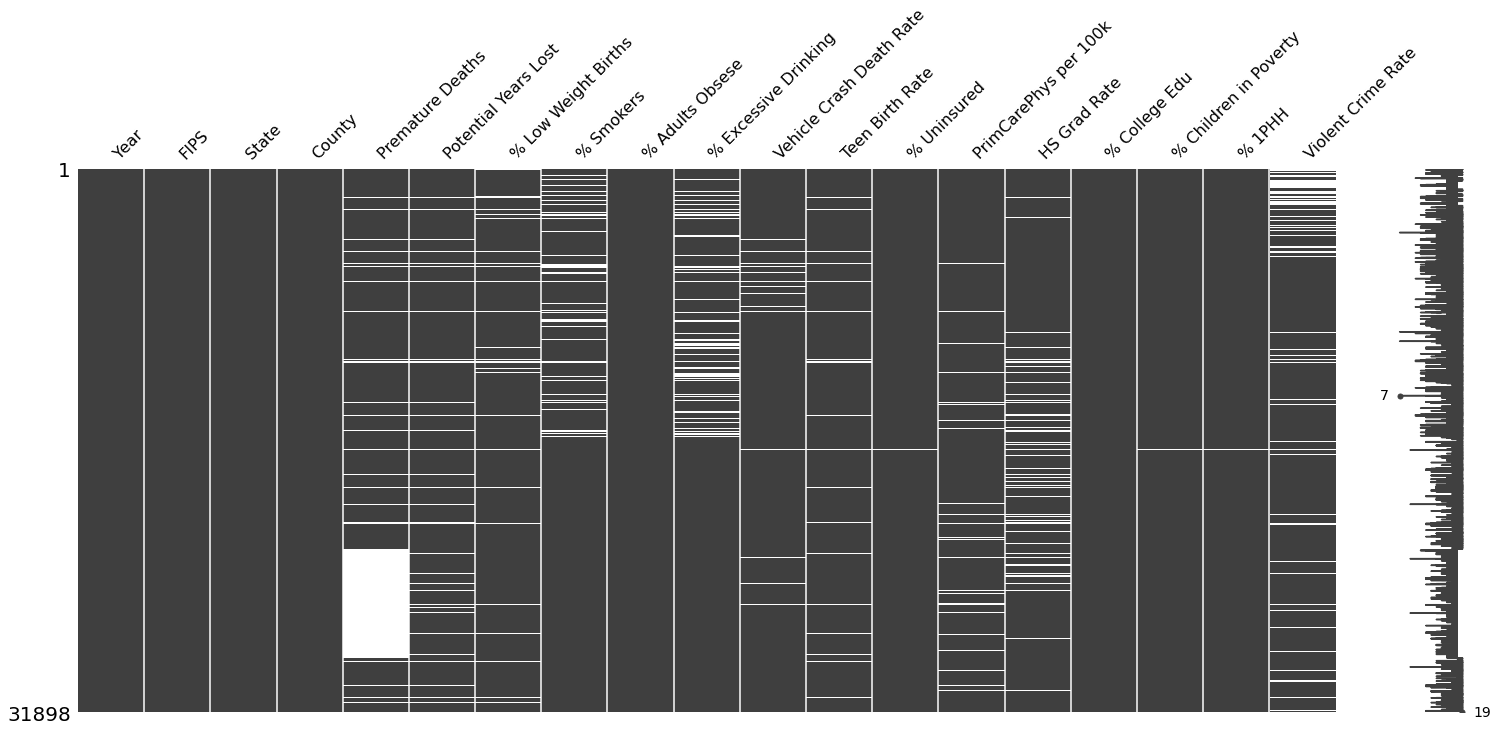

In [24]:
import missingno as msno

msno.matrix(county_health);

## GET SHEET 2 

In [109]:
### sheet previewer ### 
xls = pd.ExcelFile("2012 County Health Ranking Alabama Data - v4.xls")
sheet = xls.parse(4, header = 1)
sheet = sheet[sheet.columns.drop(list(sheet.filter(regex='95% CI')))]
sheet = sheet[sheet.columns.drop(list(sheet.filter(regex='Z-Score')))]
sheet = sheet[sheet.columns.drop(list(sheet.filter(regex='Sample Size')))]
# sheet = sheet[sheet.columns.drop(list(sheet.filter(regex='(AIAN)')))]
# sheet = sheet[sheet.columns.drop(list(sheet.filter(regex='(Asian)')))]
# sheet = sheet[sheet.columns.drop(list(sheet.filter(regex='(Black)')))]
# sheet = sheet[sheet.columns.drop(list(sheet.filter(regex='(Hispanic)')))]
# sheet = sheet[sheet.columns.drop(list(sheet.filter(regex='(White)')))]
sheet.head()
# sheet.filter(regex='ous')

#     state_year = sheet[['FIPS', 'State', 'County', 'Population', '< 18', '65 and over', 
#                         'African American', 'American Indian/ Alaskan Native', 
#                         'Asian', 'Native Hawaiian/ Other Pacific Islander', 'Hispanic', 
#                         '% not proficient in English', 'Female', 'Rural', 
#                         '% diabetic', 'HIV Rate', '% high housing costs', 
#                         '% Free lunch']] 
# ['% not proficient in English', 'Diabetes', 'HIV rate', '% high housing costs', '% Free lunch']

,FIPS,State,County,Population,< 18,65 and over,African American,American Indian/ Alaskan Native,Asian,Native Hawaiian/ Other Pacific Islander,Hispanic,Population.1,# not proficient in English,% not proficient in English,Female,Rural,% diabetic,Population.2,HIV Rate,# MPH,MPH Rate,MPH Ratio,Costs,# Uninsured,% Uninsured,% Couldn't Access,# Dentists,Dentist Rate,Dentist Ratio,Household Income,# high housing costs,Households,% high housing costs,% Free lunch,% illiterate,Homicide Rate,# Drive Alone,Workers,% Drive Alone,Zip Codes with Healthy Foods,# Zip Codes,% Healthy Foods
0,1000,Alabama,NaN,4708708,23.9,13.8,26.1,0.5,1.1,0.0,3.1,4409992,102258,2.318780,51.6,44.6,12.657063,4708708,266.500,926,19.8,5051:1,10049.78,559277,19.7,16.2,NaN,29.872815,3348:1,40538,529114,1821210,29.052882,51.2,14.8,9.483,1672185,2000289,83.597170,346,595,58.2
1,1001,Alabama,Autauga,50756,27.8,11.6,18.4,0.5,0.6,0.0,2.2,49635,466,0.938854,51.4,44.8,12.300000,50756,185.320,1,2.0,50354:1,10146.32,5312,17.8,16.7,11.0,20.990364,4764:1,53049,4973,19718,25.220611,28.8,12.7,NaN,21279,24499,86.856606,2,6,33.3
2,1003,Alabama,Baldwin,179878,23.1,17.0,10.0,0.5,0.6,0.0,3.3,164899,3640,2.207412,51.0,54.2,11.400000,179878,176.710,29,16.5,6076:1,10018.91,21017,20.0,16.1,83.0,48.142735,2077:1,47618,20569,69476,29.605907,28.9,10.6,4.496,64459,77184,83.513422,11,20,55.0
3,1005,Alabama,Barbour,29737,22.3,13.8,46.6,0.5,0.3,0.0,5.0,25962,554,2.133888,46.8,71.5,14.000000,29737,334.910,2,6.7,14918:1,9979.23,4392,24.0,17.9,9.0,32.424253,3084:1,33074,3191,9795,32.577846,65.1,23.2,NaN,7631,9661,78.987682,2,4,50.0
4,1007,Alabama,Bibb,21587,23.3,13.5,22.3,0.3,0.1,0.0,1.5,21226,175,0.824461,48.0,81.5,11.800000,21587,99.939,0,0.0,21589:0,12040.00,3028,22.9,17.9,4.0,17.826901,5610:1,35472,1518,7441,20.400484,47.8,17.5,NaN,8092,9521,84.991072,5,7,71.4


In [26]:
#### READ IN 2011 ####
# no District of Columbia *** 
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2011 = pd.DataFrame()

for i in states_full:
    filename = r"2011 County Health Ranking {} Data - v4.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(4, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Population', '< 18', '65 and over', 
                        'African American', 'American Indian/ Alaskan Native', 
                        'Asian', 'Native Hawaiian/ Other Pacific Islander', 'Hispanic', 
                        '% not proficient in English', 'Female', 'Rural', 
                        'Diabetes', 'HIV rate', '% high housing costs', 
                        '% Free lunch']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                        '% Black', '% Native', 
                        '% Asian', '% Pacific Islander','% Hispanic', 
                        '% not prof in English', '% Female', '% Rural', 
                        '% Diabetes', 'HIV Rate', '% Majority Income to Housing', 
                        '% Child Free Lunch'] 

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2011) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2011 = pd.concat([health2011, state_year]).reset_index(drop=True)
    
health2011

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/1385587364.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2011,1000,Alabama,Whole State,4708708,23.9,13.8,26.1,0.5,1.1,0.0,3.1,2.0,51.6,44.6,11.9,NaN,29.5,51.2
1,2011,1001,Alabama,Autauga,50756,27.8,11.6,18.4,0.5,0.6,0.0,2.2,0.8,51.4,44.8,11.4,169.9,25.2,28.8
2,2011,1003,Alabama,Baldwin,179878,23.1,17.0,10.0,0.5,0.6,0.0,3.3,1.8,51.0,54.2,9.8,176.1,29.4,28.9
3,2011,1005,Alabama,Barbour,29737,22.3,13.8,46.6,0.5,0.3,0.0,5.0,2.3,46.8,71.5,13.6,331.2,36.3,65.1
4,2011,1007,Alabama,Bibb,21587,23.3,13.5,22.3,0.3,0.1,0.0,1.5,0.9,48.0,81.5,11.1,89.5,17.6,47.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2011,56037,Wyoming,Sweetwater,41226,27.9,8.3,1.5,1.3,0.8,0.0,13.0,3.0,48.7,11.0,6.8,34.7,16.2,16.5
3186,2011,56039,Wyoming,Teton,20710,19.0,8.9,0.6,0.6,0.8,0.0,13.9,7.9,46.0,44.8,4.1,82.3,30.7,9.9
3187,2011,56041,Wyoming,Uinta,20927,30.7,8.2,0.3,1.2,0.4,0.1,8.5,1.5,48.5,41.5,6.3,68.4,18.7,21.5
3188,2011,56043,Wyoming,Washakie,7911,25.9,17.1,0.2,0.8,0.8,0.0,14.8,1.5,49.7,32.5,10.5,NaN,18.5,27.2


In [27]:
#### READ IN 2012 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2012 = pd.DataFrame()

for i in states_full:
    filename = r"2012 County Health Ranking {} Data - v4.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(4, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Population', '< 18', '65 and over', 
                        'African American', 'American Indian/ Alaskan Native', 
                        'Asian', 'Native Hawaiian/ Other Pacific Islander', 'Hispanic', 
                        '% not proficient in English', 'Female', 'Rural', 
                        '% diabetic', 'HIV Rate', '% high housing costs', 
                        '% Free lunch']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                        '% Black', '% Native', 
                        '% Asian', '% Pacific Islander','% Hispanic', 
                        '% not prof in English', '% Female', '% Rural', 
                        '% Diabetes', 'HIV Rate', '% Majority Income to Housing', 
                        '% Child Free Lunch'] 

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2012) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2012 = pd.concat([health2012, state_year]).reset_index(drop=True)

health2012

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/4225430830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2012,1000,Alabama,Whole State,4708708,23.9,13.8,26.1,0.5,1.1,0.0,3.1,2.318780,51.6,44.6,12.657063,266.500,29.052882,51.2
1,2012,1001,Alabama,Autauga,50756,27.8,11.6,18.4,0.5,0.6,0.0,2.2,0.938854,51.4,44.8,12.300000,185.320,25.220611,28.8
2,2012,1003,Alabama,Baldwin,179878,23.1,17.0,10.0,0.5,0.6,0.0,3.3,2.207412,51.0,54.2,11.400000,176.710,29.605907,28.9
3,2012,1005,Alabama,Barbour,29737,22.3,13.8,46.6,0.5,0.3,0.0,5.0,2.133888,46.8,71.5,14.000000,334.910,32.577846,65.1
4,2012,1007,Alabama,Bibb,21587,23.3,13.5,22.3,0.3,0.1,0.0,1.5,0.824461,48.0,81.5,11.800000,99.939,20.400484,47.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2012,56037,Wyoming,Sweetwater,41226,27.9,8.3,1.5,1.3,0.8,0.0,13.0,3.516421,48.7,11.0,6.800000,43.986,16.125495,16.5
3186,2012,56039,Wyoming,Teton,20710,19.0,8.9,0.6,0.6,0.8,0.0,13.9,9.422059,46.0,44.8,4.000000,79.455,30.468541,9.9
3187,2012,56041,Wyoming,Uinta,20927,30.7,8.2,0.3,1.2,0.4,0.1,8.5,1.651366,48.5,41.5,7.000000,68.927,19.302102,21.5
3188,2012,56043,Wyoming,Washakie,7911,25.9,17.1,0.2,0.8,0.8,0.0,14.8,2.013248,49.7,32.5,8.800000,NaN,21.977052,27.2


In [28]:
#### READ IN 2013 ####
# took out Hawaii ***rectified 
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
health2013 = pd.DataFrame()

for i in states_full:
    filename = r"2013 County Health Ranking {} Data - v1_0.xls".format(i)
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(5, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Population', '< 18', '65 and over', 
                        'African American', 'American Indian/ Alaskan Native', 
                        'Asian', 'Native Hawaiian/ Other Pacific Islander', 'Hispanic', 
                        '% not proficient in English', 'Female', 'Rural', 
                        '% diabetic', 'HIV Rate', '% high housing costs', 
                        '% Free lunch']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                        '% Black', '% Native', 
                        '% Asian', '% Pacific Islander','% Hispanic', 
                        '% not prof in English', '% Female', '% Rural', 
                        '% Diabetes', 'HIV Rate', '% Majority Income to Housing', 
                        '% Child Free Lunch'] 
    
    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2013) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2013 = pd.concat([health2013, state_year]).reset_index(drop=True)
    
health2013

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/3210189206.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2013,1000,Alabama,Whole State,4802740,23.468749,14.004214,26.188655,0.693313,1.190050,0.108834,4.036612,1.478454,51.496625,40.963183,12.657063,272.3,29.686026,48.701246
1,2013,1001,Alabama,Autauga,55267,26.033619,12.255053,18.325583,0.483109,0.924602,0.094089,2.601914,0.537955,51.220439,42.002162,12.300000,185.0,26.807681,36.116721
2,2013,1003,Alabama,Baldwin,186717,22.798674,17.072361,9.574918,0.719270,0.755689,0.065875,4.529314,1.655444,51.151743,42.279099,11.400000,179.0,30.046497,36.761939
3,2013,1005,Alabama,Barbour,27119,21.811276,14.624433,46.406578,0.648991,0.446182,0.169623,5.346805,1.545774,46.543014,67.789635,14.000000,344.5,32.401710,66.388961
4,2013,1007,Alabama,Bibb,22766,22.050426,13.261003,22.217342,0.311869,0.127383,0.131775,1.989809,0.802276,46.138979,68.352607,11.800000,99.5,21.993080,53.502278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,2013,56037,Wyoming,Sweetwater,44175,27.110357,8.547821,1.050368,1.265422,0.855688,0.140351,15.540464,2.187674,47.782683,10.916313,6.800000,52.8,16.378365,25.301359
3180,2013,56039,Wyoming,Teton,21548,19.287173,10.455727,0.264526,1.062744,1.243735,0.129942,15.379618,4.293859,47.535734,46.430920,4.000000,78.9,30.899807,14.495114
3181,2013,56041,Wyoming,Uinta,20985,29.969025,9.368597,0.366929,1.181797,0.381225,0.195378,9.054086,0.687375,49.459137,43.095937,7.000000,83.6,19.064006,27.702089
3182,2013,56043,Wyoming,Washakie,8487,25.073642,18.392836,0.306351,1.720278,0.683398,0.082479,13.738659,1.903667,49.617061,35.954529,8.800000,NaN,22.690531,32.758621


In [29]:
#### READ IN Hawaii 2013 #### 
xls = pd.ExcelFile('2013 County Health Ranking Hawaii Data - v1_0.xls')
sheet = xls.parse(4, header = 1)

state_year = sheet[['FIPS', 'State', 'County', 'Population', '< 18', '65 and over', 
                    'African American', 'American Indian/ Alaskan Native', 
                    'Asian', 'Native Hawaiian/ Other Pacific Islander', 'Hispanic', 
                    '% not proficient in English', 'Female', 'Rural', 
                    '% diabetic', 'HIV Rate', '% high housing costs', 
                    '% Free lunch']] 

state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                    '% Black', '% Native', 
                    '% Asian', '% Pacific Islander','% Hispanic', 
                    '% not prof in English', '% Female', '% Rural', 
                    '% Diabetes', 'HIV Rate', '% Majority Income to Housing', 
                    '% Child Free Lunch'] 

state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

state_year.insert(0, "Year", 2013) # add the year 

# Label total County value  
state_year['County'][0] = 'Whole State' 

state_year


# Append Hawaii 2013 to rest of 2013
health2013 = pd.concat([health2013, state_year]).reset_index(drop=True)
    
health2013

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/2217450245.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2013,1000,Alabama,Whole State,4802740,23.468749,14.004214,26.188655,0.693313,1.190050,0.108834,4.036612,1.478454,51.496625,40.963183,12.657063,272.3,29.686026,48.701246
1,2013,1001,Alabama,Autauga,55267,26.033619,12.255053,18.325583,0.483109,0.924602,0.094089,2.601914,0.537955,51.220439,42.002162,12.300000,185.0,26.807681,36.116721
2,2013,1003,Alabama,Baldwin,186717,22.798674,17.072361,9.574918,0.719270,0.755689,0.065875,4.529314,1.655444,51.151743,42.279099,11.400000,179.0,30.046497,36.761939
3,2013,1005,Alabama,Barbour,27119,21.811276,14.624433,46.406578,0.648991,0.446182,0.169623,5.346805,1.545774,46.543014,67.789635,14.000000,344.5,32.401710,66.388961
4,2013,1007,Alabama,Bibb,22766,22.050426,13.261003,22.217342,0.311869,0.127383,0.131775,1.989809,0.802276,46.138979,68.352607,11.800000,99.5,21.993080,53.502278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2013,15001,Hawaii,Hawaii,186738,22.552989,15.140464,0.606732,0.611017,22.572267,12.395442,11.776393,2.234220,49.771337,37.990804,7.800000,NaN,39.008869,51.715873
3186,2013,15003,Hawaii,Honolulu,963607,21.954282,14.822433,2.296995,0.364464,43.639990,9.584405,8.465069,5.403051,49.829650,0.862877,8.600000,NaN,43.036895,33.181064
3187,2013,15005,Hawaii,Kalawao,90,0.000000,30.000000,0.000000,0.000000,7.777778,48.888889,1.111111,8.771930,53.333333,100.000000,8.500000,NaN,6.521739,NaN
3188,2013,15007,Hawaii,Kauai,67701,22.420644,15.527097,0.506639,0.494823,31.785350,9.211090,9.685234,2.746456,49.767359,12.860145,8.600000,NaN,41.075672,34.365782


In [30]:
#### READ IN 2014 #### 
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2014 = pd.DataFrame()

for i in states_full:

    filename = r"2014 County Health Rankings {} Data - v6.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    
    sheet = xls.parse(4, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Population', '< 18', '65 and over', 
                        'African American', 'American Indian/ Alaskan Native', 
                        'Asian', 'Native Hawaiian/ Other Pacific Islander', 'Hispanic', 
                        '% Not Proficient in English', 'Female', 'Rural', 
                        '% Diabetic', 'HIV Rate',  
                        '% Free Lunch']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                        '% Black', '% Native', 
                        '% Asian', '% Pacific Islander','% Hispanic', 
                        '% not prof in English', '% Female', '% Rural', 
                        '% Diabetes', 'HIV Rate',  
                        '% Child Free Lunch'] 

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2014) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2014 = pd.concat([health2014, state_year]).reset_index(drop=True)

health2014.insert(17, '% Majority Income to Housing', np.nan)
health2014

,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2014,1000.0,Alabama,Whole State,4822023.0,23.318138,14.503871,26.174904,0.693009,1.197122,0.108437,3.993056,1.451064,51.499983,40.963183,12.653027,289.9,NaN,48.701246
1,2014,1001.0,Alabama,Autauga,55514.0,25.955615,13.048961,18.009821,0.509099,0.917100,0.101098,2.484113,0.438691,51.137348,42.002162,11.800000,181.1,NaN,36.116721
2,2014,1003.0,Alabama,Baldwin,190790.0,22.583469,17.729965,9.375903,0.732752,0.763796,0.064230,4.496066,1.841193,51.131510,42.279099,11.800000,188.1,NaN,36.761939
3,2014,1005.0,Alabama,Barbour,27201.0,21.201426,15.231058,46.721341,0.633398,0.453996,0.183063,4.946363,2.170638,46.336909,67.789635,14.200000,388.1,NaN,66.388961
4,2014,1007.0,Alabama,Bibb,22597.0,21.560384,13.860247,22.055590,0.347436,0.136336,0.131938,2.027443,0.498672,46.033072,68.352607,11.100000,106.7,NaN,53.502278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2014,56037.0,Wyoming,Sweetwater,45267.0,26.986546,8.781231,1.034530,1.186533,0.819003,0.120241,15.644993,2.282333,47.788012,10.916313,7.100000,58.9,NaN,25.301359
3186,2014,56039.0,Wyoming,Teton,21675.0,19.391003,11.192618,0.256470,1.016554,1.231056,0.111914,15.113080,5.044318,47.582187,46.430920,3.900000,87.5,NaN,14.495114
3187,2014,56041.0,Wyoming,Uinta,21025.0,29.255648,9.864447,0.329844,1.147282,0.382427,0.191214,8.633300,0.895041,49.490893,43.095937,7.400000,79.9,NaN,27.702089
3188,2014,56043.0,Wyoming,Washakie,8464.0,24.964556,18.679112,0.307002,1.653088,0.743889,0.059039,13.614358,1.510344,49.639863,35.954529,8.500000,NaN,NaN,32.758621


In [31]:
#### READ IN 2015 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2015 = pd.DataFrame()

for i in states_full:
    filename = r"2015 County Health Rankings {} Data - v3.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(4, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Population', 
                        '% < 18', '% 65 and over', 
                        '% African American', '% American Indian/ Alaskan Native', 
                        '% Asian', '% Native Hawaiian/ Other Pacific Islander', '% Hispanic', 
                        '% Not Proficient in English', '% Female', '% Rural', 
                        '% Diabetic', 'HIV Prevalence Rate',  
                        '% Free Lunch']]

    state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                        '% Black', '% Native', 
                        '% Asian', '% Pacific Islander','% Hispanic', 
                        '% not prof in English', '% Female', '% Rural', 
                        '% Diabetes', 'HIV Rate', 
                        '% Child Free Lunch'] 
    
    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2015) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2015 = pd.concat([health2015, state_year]).reset_index(drop=True)

health2015.insert(17, '% Majority Income to Housing', np.nan)
health2015

,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2015,1000.0,Alabama,Whole State,4833722.0,22.994310,14.919476,26.276749,0.694723,1.279738,0.106254,4.096615,1.402359,51.479481,40.963183,12.9,289.9,NaN,50.026658
1,2015,1001.0,Alabama,Autauga,55246.0,25.393694,13.514101,18.272816,0.501394,1.136734,0.094124,2.698838,0.476487,51.496941,42.002162,12.1,181.1,NaN,38.340967
2,2015,1003.0,Alabama,Baldwin,195540.0,22.422011,18.134908,9.379667,0.737445,0.884218,0.065971,4.576557,1.560030,51.167536,42.279099,11.5,188.1,NaN,34.407666
3,2015,1005.0,Alabama,Barbour,27076.0,21.110947,15.859063,47.145073,0.587236,0.524450,0.184665,4.834540,2.230859,46.513518,67.789635,14.8,388.1,NaN,69.677926
4,2015,1007.0,Alabama,Bibb,22512.0,21.290867,14.285714,22.014925,0.395345,0.155473,0.133262,2.070007,0.428625,45.993248,68.352607,12.7,106.7,NaN,54.648206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2015,56037.0,Wyoming,Sweetwater,45237.0,27.192343,9.008113,1.483299,1.248978,0.875390,0.163583,15.863121,1.979422,47.874527,10.916313,7.6,58.9,NaN,24.744866
3186,2015,56039.0,Wyoming,Teton,22268.0,19.153045,11.806179,1.369678,1.014909,1.275373,0.130232,15.052991,3.032839,47.974672,46.430920,4.3,87.5,NaN,12.535268
3187,2015,56041.0,Wyoming,Uinta,21066.0,29.516757,10.500332,0.735783,1.267445,0.417735,0.218361,9.052502,0.924109,49.302193,43.095937,8.2,79.9,NaN,27.334697
3188,2015,56043.0,Wyoming,Washakie,8463.0,24.388515,19.201229,0.768049,1.666076,0.732601,0.141794,14.155737,1.511525,49.663240,35.954529,9.7,NaN,NaN,30.852503


In [36]:
#### READ IN 2016 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2016 = pd.DataFrame()

for i in states_full:
    filename = r"2016 County Health Rankings {} Data - v3.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(4, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Population', 
                        '% < 18', '% 65 and over', 
                        '% African American', '% American Indian/Alaskan Native', 
                        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', 
                        '% Not Proficient in English', '% Female', '% Rural', 
                        '% Diabetic', 'HIV Prevalence Rate',  
                        '% Free Lunch']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                        '% Black', '% Native', 
                        '% Asian', '% Pacific Islander','% Hispanic', 
                        '% not prof in English', '% Female', '% Rural', 
                        '% Diabetes', 'HIV Rate', 
                        '% Child Free Lunch'] 

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2016) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2016 = pd.concat([health2016, state_year]).reset_index(drop=True)

health2016.insert(17, '% Majority Income to Housing', np.nan)
health2016

,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2016,1000.0,Alabama,Whole State,4849377.0,22.839449,15.340775,26.364603,0.696419,1.332810,0.104941,4.137934,1.313271,51.540847,40.963183,12.363084,298.019250,NaN,51.404910
1,2016,1001.0,Alabama,Autauga,55395.0,25.177363,13.829768,18.494449,0.496435,1.088546,0.101092,2.733099,0.481429,51.362036,42.002162,10.900000,205.406838,NaN,36.945559
2,2016,1003.0,Alabama,Baldwin,200111.0,22.160701,18.682131,9.395785,0.743587,0.907996,0.063964,4.562468,1.429898,51.228568,42.279099,10.900000,174.324882,NaN,36.160305
3,2016,1005.0,Alabama,Barbour,26887.0,21.166363,16.487522,47.193811,0.591364,0.490944,0.174806,4.533790,2.150664,46.613605,67.789635,15.300000,399.426909,NaN,NaN
4,2016,1007.0,Alabama,Bibb,22506.0,21.021061,14.787168,21.909713,0.422110,0.222163,0.128855,2.106105,0.521100,45.934417,68.352607,12.500000,124.837451,NaN,54.964029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2016,56037.0,Wyoming,Sweetwater,45010.0,27.033992,9.497889,1.268607,1.250833,0.897578,0.177738,15.818707,1.869863,48.109309,10.916313,7.600000,52.627205,NaN,26.055562
3186,2016,56039.0,Wyoming,Teton,22930.0,19.066725,12.232883,1.011775,1.046664,1.295246,0.117750,15.167902,3.907346,48.181422,46.430920,6.800000,75.864311,NaN,17.893044
3187,2016,56041.0,Wyoming,Uinta,20904.0,29.793341,11.045733,0.774971,1.238997,0.464026,0.200918,9.160926,0.936514,49.550325,43.095937,8.300000,60.488749,NaN,26.630062
3188,2016,56043.0,Wyoming,Washakie,8322.0,23.948570,20.115357,0.781062,1.730353,0.720981,0.096131,13.938957,1.538462,49.303052,35.954529,10.500000,NaN,NaN,30.417495


In [37]:
#### READ IN 2017 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2017 = pd.DataFrame()

for i in states_full:
    filename = r"2017 County Health Rankings {} Data - v2.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(4, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Population', 
                        '% < 18', '% 65 and over', 
                        '% African American', '% American Indian/Alaskan Native', 
                        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', 
                        '% Not Proficient in English', '% Female', '% Rural', 
                        '% Diabetic', 'HIV Prevalence Rate',  
                        '% Free or Reduced Lunch']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                        '% Black', '% Native', 
                        '% Asian', '% Pacific Islander','% Hispanic', 
                        '% not prof in English', '% Female', '% Rural', 
                        '% Diabetes', 'HIV Rate', 
                        '% Child Free Lunch'] 

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2017) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2017 = pd.concat([health2017, state_year]).reset_index(drop=True)

health2017.insert(17, '% Majority Income to Housing', np.nan)
health2017

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/2150241204.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2017,1000,Alabama,Whole State,4858979,22.710450,15.726802,26.451174,0.699324,1.382924,0.104281,4.184521,1.230232,51.570402,40.963183,13.719615,297.4,NaN,51.769302
1,2017,1001,Alabama,Autauga,55347,24.700526,14.311525,18.958570,0.482411,1.199704,0.099373,2.842069,0.650263,51.475238,42.002162,13.000000,205.0,NaN,48.902692
2,2017,1003,Alabama,Baldwin,203709,21.952393,19.175392,9.370229,0.738799,0.936139,0.060380,4.549627,1.169385,51.260867,42.279099,10.400000,169.0,NaN,41.838802
3,2017,1005,Alabama,Barbour,26489,21.250330,17.161841,47.298879,0.577598,0.445468,0.184982,4.424478,1.755971,46.589150,67.789635,18.400000,399.9,NaN,67.368141
4,2017,1007,Alabama,Bibb,22583,20.772262,15.020148,22.051986,0.425099,0.230262,0.137271,2.408892,0.353966,46.109906,68.352607,14.800000,120.0,NaN,63.449508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,2017,56037,Wyoming,Sweetwater,44626,26.854300,10.025546,1.189889,1.290727,0.961323,0.197194,15.829337,2.194539,48.144579,10.916313,8.100000,61.6,NaN,32.409382
3181,2017,56039,Wyoming,Teton,23125,18.806486,12.977297,0.592432,1.072432,1.262703,0.134054,15.018378,3.537299,48.367568,46.430920,4.800000,83.2,NaN,27.164623
3182,2017,56041,Wyoming,Uinta,20822,29.492844,11.679954,0.643550,1.267890,0.509077,0.249736,9.072135,1.323575,49.702238,43.095937,9.000000,60.4,NaN,38.412842
3183,2017,56043,Wyoming,Washakie,8328,23.727185,20.329011,0.708453,1.729107,0.720461,0.132085,14.337176,1.147830,49.075408,35.954529,12.000000,NaN,NaN,45.567867


In [38]:
#### READ IN 2018 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2018 = pd.DataFrame()

for i in states_full:
    filename = r"2018 County Health Rankings {} Data - v3.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(4, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Population', 
                        '% < 18', '% 65 and over', 
                        '% African American', '% American Indian/Alaskan Native', 
                        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', 
                        '% Not Proficient in English', '% Female', '% Rural', 
                        '% Diabetic', 'HIV Prevalence Rate',  
                        '% Free or Reduced Lunch']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                        '% Black', '% Native', 
                        '% Asian', '% Pacific Islander','% Hispanic', 
                        '% not prof in English', '% Female', '% Rural', 
                        '% Diabetes', 'HIV Rate',  
                        '% Child Free Lunch'] 
    
    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2018) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2018 = pd.concat([health2018, state_year]).reset_index(drop=True)
    
health2018.insert(17, '% Majority Income to Housing', np.nan)
health2018

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/2169829941.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2018,1000,Alabama,Whole State,4863300,22.553061,16.132071,26.489894,0.697716,1.415993,0.104209,4.191495,1.137962,51.564041,40.963183,13.7,302.4,NaN,51.089554
1,2018,1001,Alabama,Autauga,55416,24.408113,14.728598,19.048650,0.485419,1.140465,0.101054,2.688754,0.832739,51.288437,42.002162,12.4,225.5,NaN,48.475388
2,2018,1003,Alabama,Baldwin,208563,21.734440,19.708194,9.042831,0.770990,1.074975,0.059454,4.416411,0.818809,51.457833,42.279099,11.1,163.9,NaN,45.795480
3,2018,1005,Alabama,Barbour,25965,21.136145,18.016561,47.513961,0.631619,0.450607,0.173310,4.213364,1.519370,46.932409,67.789635,18.2,436.0,NaN,66.302611
4,2018,1007,Alabama,Bibb,22643,20.752550,15.430817,21.618160,0.379808,0.198737,0.119242,2.499669,0.448137,46.363114,68.352607,14.6,191.9,NaN,61.318483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,2018,56037,Wyoming,Sweetwater,44165,26.867429,10.472093,1.075512,1.455904,0.797011,0.156232,16.076078,2.140040,48.178422,10.916313,7.9,86.5,NaN,32.962744
3187,2018,56039,Wyoming,Teton,23191,18.774525,13.526799,0.556250,0.905524,1.220301,0.129361,15.122246,3.622952,48.402397,46.430920,4.5,50.5,NaN,24.512635
3188,2018,56041,Wyoming,Uinta,20773,29.355413,12.598084,0.669138,1.280508,0.553603,0.206999,9.016512,1.329196,49.429548,43.095937,10.0,NaN,NaN,36.837231
3189,2018,56043,Wyoming,Washakie,8235,23.897996,20.910747,0.485732,1.663631,0.837887,0.121433,13.928355,0.659647,49.678203,35.954529,11.5,NaN,NaN,43.032787


In [39]:
#### READ IN 2019 ####
states_full = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2019 = pd.DataFrame()

for i in states_full:
    filename = r"2019 County Health Rankings {} Data - v1_0.xls".format(i)
    
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(4, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Population', 
                        '% < 18', '% 65 and over', 
                        '% African American', '% American Indian/Alaskan Native', 
                        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', 
                        '% Not Proficient in English', '% Female', '% Rural', 
                        '% Diabetic', 'HIV Prevalence Rate', '% Severe Housing Cost Burden', 
                        '% Free or Reduced Lunch']] 
    
    state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                        '% Black', '% Native', 
                        '% Asian', '% Pacific Islander','% Hispanic', 
                        '% not prof in English', '% Female', '% Rural', 
                        '% Diabetes', 'HIV Rate', '% Majority Income to Housing', 
                        '% Child Free Lunch'] 

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2019) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2019 = pd.concat([health2019, state_year]).reset_index(drop=True)

health2019

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/3336353110.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2019,1000,Alabama,Whole State,4874747,22.472407,16.488466,26.520905,0.699688,1.463420,0.107472,4.329620,1.074846,51.590595,40.963183,13.9,302.4,12.917608,51.741453
1,2019,1001,Alabama,Autauga,55504,23.937014,15.119631,19.254468,0.475641,1.279187,0.104497,2.857452,0.828548,51.342246,42.002162,14.2,225.5,12.645206,47.931664
2,2019,1003,Alabama,Baldwin,212628,21.848487,19.947044,8.953195,0.776003,1.156480,0.068665,4.550200,0.454512,51.452772,42.279099,11.3,163.9,12.795922,45.079131
3,2019,1005,Alabama,Barbour,25270,20.763751,18.824693,47.942224,0.652948,0.463000,0.185991,4.206569,1.199273,47.229917,67.789635,18.0,436.0,13.586765,73.769808
4,2019,1007,Alabama,Bibb,22668,20.606141,16.022587,21.457561,0.427916,0.220575,0.114699,2.638080,0.394348,46.453150,68.352607,14.9,191.9,8.733889,65.329687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,2019,56037,Wyoming,Sweetwater,43534,26.517205,11.375017,1.091101,1.534433,0.833831,0.142417,16.249368,1.582845,48.454082,10.916313,8.4,86.5,9.284945,35.276550
3187,2019,56039,Wyoming,Teton,23265,18.796475,14.395014,0.532989,0.906942,1.229314,0.133247,14.983881,4.042033,48.098001,46.430920,4.2,50.5,10.591792,23.774250
3188,2019,56041,Wyoming,Uinta,20495,29.212003,13.188583,0.683093,1.395462,0.492803,0.175653,9.163211,0.911363,49.573067,43.095937,9.3,NaN,8.404941,37.183617
3189,2019,56043,Wyoming,Washakie,8064,23.809524,20.808532,0.471230,1.723710,0.756448,0.111607,14.248512,0.346198,49.466766,35.954529,10.9,NaN,8.936686,40.735600


In [40]:
#### READ IN 2020 ####
# took out Alaska, Louisiana***both rectified 
states_full = ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
               'Delaware', 'Florida', 'Georgia', 'Hawaii',
               'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
               'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
               'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
               'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
               'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
               'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

health2020 = pd.DataFrame()

for i in states_full:
    filename = r"2020 County Health Rankings {} Data - v1_0.xlsx".format(i)
    xls = pd.ExcelFile(filename)
    sheet = xls.parse(4, header = 1)
    
    state_year = sheet[['FIPS', 'State', 'County', 'Population', 
                        '% less than 18 years of age', '% 65 and over', 
                        '% Black', '% American Indian & Alaska Native', 
                        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', 
                        '% Not Proficient in English', '% Female', '% Rural', 
                        '% Adults with Diabetes', 'HIV Prevalence Rate', 
                        '% Severe Housing Cost Burden', 
                        '% Enrolled in Free or Reduced Lunch']] 

    state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                        '% Black', '% Native', 
                        '% Asian', '% Pacific Islander','% Hispanic', 
                        '% not prof in English', '% Female', '% Rural', 
                        '% Diabetes', 'HIV Rate', '% Majority Income to Housing', 
                        '% Child Free Lunch'] 

    state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

    state_year.insert(0, "Year", 2020) # add the year 

    # Label total County value  
    state_year['County'][0] = 'Whole State' 

    # append each year's spatial df to the ones we already made 
    health2020 = pd.concat([health2020, state_year]).reset_index(drop=True)

health2020

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/3813802423.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2020,1000,Alabama,Whole State,4887871,22.296824,16.917263,26.497733,0.703271,1.496909,0.106529,4.443264,1.061048,51.633032,40.963183,14.2,309.9,12.653817,55.874153
1,2020,1001,Alabama,Autauga,55601,23.674035,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,0.820225,51.448715,42.002162,11.1,219.1,13.403481,43.408673
2,2020,1003,Alabama,Baldwin,218022,21.607911,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,0.543517,51.538377,42.279099,10.7,166.5,11.725808,48.486565
3,2020,1005,Alabama,Barbour,24881,20.867328,19.420441,48.032635,0.659137,0.454162,0.184880,4.276355,1.631683,47.216752,67.789635,17.6,420.6,14.059546,63.292302
4,2020,1007,Alabama,Bibb,22400,20.477679,16.473214,21.120536,0.437500,0.236607,0.116071,2.625000,0.268210,46.781250,68.352607,14.5,196.8,9.886874,61.562116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,2020,56037,Wyoming,Sweetwater,43051,26.224710,12.111217,1.145153,1.544680,1.010429,0.157952,16.083250,1.633221,48.544749,10.916313,8.8,73.1,8.385595,39.333579
3092,2020,56039,Wyoming,Teton,23081,18.365755,15.415277,0.632555,0.914172,1.412417,0.151640,14.878038,4.314477,48.403449,46.430920,2.2,65.4,10.769059,22.206991
3093,2020,56041,Wyoming,Uinta,20299,28.789596,14.079511,0.684763,1.418789,0.472930,0.147791,9.236908,0.696080,49.332479,43.095937,11.3,30.8,7.707668,37.784558
3094,2020,56043,Wyoming,Washakie,7885,22.739379,21.686747,0.469245,1.813570,0.824350,0.101458,14.051997,0.324886,49.422955,35.954529,11.7,0.0,6.816780,37.508651


In [41]:
#### READ IN ALASKA 2020 ####

xls = pd.ExcelFile("2020 County Health Rankings Alaska Data - v1_0.xlsx")
sheet = xls.parse(4, header = 1)

state_year = sheet[['FIPS', 'State', 'Borough', 'Population', 
                    '% less than 18 years of age', '% 65 and over', 
                    '% Black', '% American Indian & Alaska Native', 
                    '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', 
                    '% Not Proficient in English', '% Female', '% Rural', 
                    '% Adults with Diabetes', 'HIV Prevalence Rate', 
                    '% Severe Housing Cost Burden', 
                    '% Enrolled in Free or Reduced Lunch']] 

state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                    '% Black', '% Native', 
                    '% Asian', '% Pacific Islander','% Hispanic', 
                    '% not prof in English', '% Female', '% Rural', 
                    '% Diabetes', 'HIV Rate', '% Majority Income to Housing', 
                    '% Child Free Lunch'] 

state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

state_year.insert(0, "Year", 2020) # add the year 

# Label total County value  
state_year['County'][0] = 'Whole State' 
alaska2020 = state_year.copy() 
# alaska2020

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/3566970851.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


In [42]:
#### READ IN LOUISIANA 2020 ####
xls = pd.ExcelFile("2020 County Health Rankings Louisiana Data - v1_0.xlsx")
sheet = xls.parse(4, header = 1)

state_year = sheet[['FIPS', 'State', 'Parish', 'Population', 
                    '% less than 18 years of age', '% 65 and over', 
                    '% Black', '% American Indian & Alaska Native', 
                    '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', 
                    '% Not Proficient in English', '% Female', '% Rural', 
                    '% Adults with Diabetes', 'HIV Prevalence Rate', 
                    '% Severe Housing Cost Burden', 
                    '% Enrolled in Free or Reduced Lunch']] 

state_year.columns = ['FIPS', 'State', 'County', 'Population', '% Age<18', '% Age>=65', 
                    '% Black', '% Native', 
                    '% Asian', '% Pacific Islander','% Hispanic', 
                    '% not prof in English', '% Female', '% Rural', 
                    '% Diabetes', 'HIV Rate', '% Majority Income to Housing', 
                    '% Child Free Lunch'] 

state_year = state_year.dropna(axis = 0, how ='all') # drop rows where all values are missing 

state_year.insert(0, "Year", 2020) # add the year 

# Label total County value  
state_year['County'][0] = 'Whole State' 
louisiana2020 = state_year.copy() 
louisiana2020

#### append each year's spatial df to the ones we already made 
health2020 = pd.concat([health2020, alaska2020, louisiana2020]).reset_index(drop=True)

health2020 

C:\Users\rhian\AppData\Local\Temp/ipykernel_1784/2891670923.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_year['County'][0] = 'Whole State'


,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2020,1000,Alabama,Whole State,4887871,22.296824,16.917263,26.497733,0.703271,1.496909,0.106529,4.443264,1.061048,51.633032,40.963183,14.2,309.9,12.653817,55.874153
1,2020,1001,Alabama,Autauga,55601,23.674035,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,0.820225,51.448715,42.002162,11.1,219.1,13.403481,43.408673
2,2020,1003,Alabama,Baldwin,218022,21.607911,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,0.543517,51.538377,42.279099,10.7,166.5,11.725808,48.486565
3,2020,1005,Alabama,Barbour,24881,20.867328,19.420441,48.032635,0.659137,0.454162,0.184880,4.276355,1.631683,47.216752,67.789635,17.6,420.6,14.059546,63.292302
4,2020,1007,Alabama,Bibb,22400,20.477679,16.473214,21.120536,0.437500,0.236607,0.116071,2.625000,0.268210,46.781250,68.352607,14.5,196.8,9.886874,61.562116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,2020,22119,Louisiana,Webster,38798,22.630032,19.758750,34.009485,0.556730,0.435589,0.025775,1.992371,0.107709,51.386669,53.041959,14.4,219.5,15.188418,43.624377
3187,2020,22121,Louisiana,West Baton Rouge,26427,24.448481,13.648920,39.376395,0.238393,0.715178,0.056760,3.216407,0.328141,50.630037,30.460737,9.1,507.2,11.092697,67.413704
3188,2020,22123,Louisiana,West Carroll,10982,23.065015,19.031142,15.616463,0.855946,0.318703,0.027317,3.961027,0.122676,49.116736,100.000000,24.8,150.3,6.351931,91.858754
3189,2020,22125,Louisiana,West Feliciana,15460,16.170763,15.025873,44.275550,0.174644,0.265201,0.038810,1.558862,0.487970,34.631307,100.000000,8.4,1088.4,11.092623,49.682107


### Put all the Years together

In [43]:
# append each year's spatial df to the ones we already made 
county_health_dem = pd.concat([health2011, health2012, health2013, health2014, health2015, 
                               health2016, health2017, health2018, health2019, health2020]).reset_index(drop=True)

county_health_dem

,Year,FIPS,State,County,Population,% Age<18,% Age>=65,% Black,% Native,% Asian,% Pacific Islander,% Hispanic,% not prof in English,% Female,% Rural,% Diabetes,HIV Rate,% Majority Income to Housing,% Child Free Lunch
0,2011,1000.0,Alabama,Whole State,4708708.0,23.900000,13.800000,26.100000,0.500000,1.100000,0.000000,3.100000,2.000000,51.600000,44.600000,11.9,NaN,29.500000,51.200000
1,2011,1001.0,Alabama,Autauga,50756.0,27.800000,11.600000,18.400000,0.500000,0.600000,0.000000,2.200000,0.800000,51.400000,44.800000,11.4,169.9,25.200000,28.800000
2,2011,1003.0,Alabama,Baldwin,179878.0,23.100000,17.000000,10.000000,0.500000,0.600000,0.000000,3.300000,1.800000,51.000000,54.200000,9.8,176.1,29.400000,28.900000
3,2011,1005.0,Alabama,Barbour,29737.0,22.300000,13.800000,46.600000,0.500000,0.300000,0.000000,5.000000,2.300000,46.800000,71.500000,13.6,331.2,36.300000,65.100000
4,2011,1007.0,Alabama,Bibb,21587.0,23.300000,13.500000,22.300000,0.300000,0.100000,0.000000,1.500000,0.900000,48.000000,81.500000,11.1,89.5,17.600000,47.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31893,2020,22119.0,Louisiana,Webster,38798.0,22.630032,19.758750,34.009485,0.556730,0.435589,0.025775,1.992371,0.107709,51.386669,53.041959,14.4,219.5,15.188418,43.624377
31894,2020,22121.0,Louisiana,West Baton Rouge,26427.0,24.448481,13.648920,39.376395,0.238393,0.715178,0.056760,3.216407,0.328141,50.630037,30.460737,9.1,507.2,11.092697,67.413704
31895,2020,22123.0,Louisiana,West Carroll,10982.0,23.065015,19.031142,15.616463,0.855946,0.318703,0.027317,3.961027,0.122676,49.116736,100.000000,24.8,150.3,6.351931,91.858754
31896,2020,22125.0,Louisiana,West Feliciana,15460.0,16.170763,15.025873,44.275550,0.174644,0.265201,0.038810,1.558862,0.487970,34.631307,100.000000,8.4,1088.4,11.092623,49.682107


In [44]:
county_health_dem.to_csv('countyhealth_sheet2.csv', index = False)

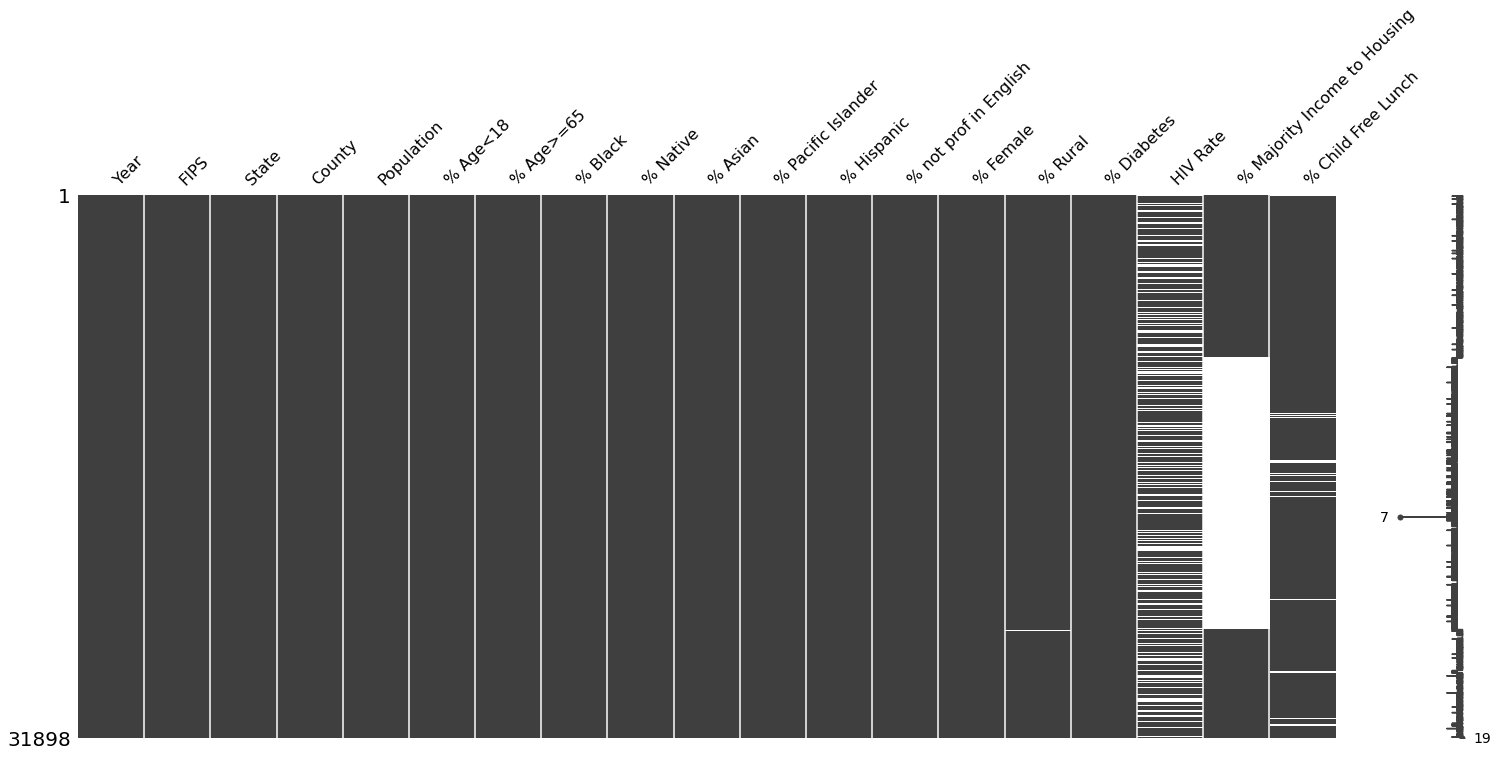

In [45]:
import missingno as msno

msno.matrix(county_health_dem);